<h1> Used Vehicle Sales Price Prediction </h1>

*Final Project – CMSC320 (Fall 2025)*

Zachary Gottlieb, Kehan Bhati, Joseph Jenkins, Jack Perlman, Simon Benarroch, Aidan Ritta

<h1>Contributions </h1>

Zachary: (A, B, C, F, G, H) Found dataset, completed summary statistics, and visualizations. Did the linear regressions for log age-at-sale vs selling price.

Kehan: (A, F, G, H) Wrote the introduction, formatted the final deliverable, brainstormed for the project idea, and helped with analyzing final results.

Joseph: (C, E, F) Assisted in data exploration and creating/revising conclusions. Updated and revised ML analysis and conclusions. Created all visualization section and analysis.

Jack:

Simon:

Aiden: (F, G) Did the conclusion and helped with the formatting in the final deliverable.

<h1>Introduction </h1>

Accurately predicting the price of a used car is an important challenge with many complexities. It has great value for both consumers and professional members of the automobile industry. This project focuses on understanding which factors strongly influence the selling price of used cars and on developing a predictive model that can estimate prices based on those factors. Since car purchases are one of the largest financial decisions made by many individuals, accurate pricing is essential for helping consumers avoid overpaying and helping sellers accurately value their vehicles.

The significance of our analysis extends beyond individual transactions; pricing insights can also help dealerships, online marketplaces, and businesses make large-scale decisions. This investigation centers on several key questions: Which characteristics are most strongly correlated with selling price? How accurately does a machine learning model predict used car prices using these features? What patterns about the used vehicle market can be revealed through this analysis? How can these patterns be utilized to benefit both consumers and sellers of the industry? Our project aims to answer these questions through the study of the Vehicle Sales dataset from Kaggle. The predictive model provides key insights which can help anyone improve their decision-making in the used vehicle marketplace.

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress, zscore

<h1>Data Curation</h1>

This dataset represents an amalgamation of vehicle sales data. It includes pertinent categorical and numerical data to the sale event including hard data like miles, engine size, manufacturer, state, and abstracted data like the Manheim Market Report (MMR) vehicle value estimate.

https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data

<h3>Data preprocessing</h3>


Below you will be able to see what our dataset looks like. It has a lot of different labels like year, make, model, etc. and many different data types between them.

In [ ]:
# Load and convert types
# (a) Import
# (b) Parse

car_sales_df = pd.read_csv("car_sales_data.csv")
display(car_sales_df.head())
display(car_sales_df.dtypes)

year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors america  inc  20800.0       21500.0   
2  financial services remarketing (lease)  31900.0       30000.0   
3                 volvo na rep/world omni  27500.0       27750.0   
4  financial services remarketing (lease)  66000.0       67000.0   

                                  saledate  
0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
1  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
2  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)  
3  Thu Jan 29 2015 04:30:00 GMT-0800 (PST)  
4  Thu Dec 18 2014 12:30:00 GMT-0800 (PST)

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

<h3>Cleaning</h3>
In order for our data set to be accurate and useable for our model we need to make sure the data is clean. This involves dealing with the missing
entries and converting some data to be in a different format. Below you can see the amount of data that is missing in the dataset by the label. For
example the make column is missing 10,301 entries.

In [ ]:
# Data Testing/Cleaning
display(car_sales_df.isna().sum())

display(car_sales_df[car_sales_df.isna().any(axis=1)].head())

car_sales_df = car_sales_df.dropna()

# Convert sale date to datetime object

car_sales_df["saledate"] = pd.to_datetime(
    car_sales_df["saledate"].str.split(" \(").str[0],  # apply split elementwise
    format="%a %b %d %Y %H:%M:%S GMT%z",
    utc=True
)

# Cars are released in the previous year
car_sales_df["year"] = pd.to_datetime(car_sales_df["year"] - 1, format="%Y", utc=True)

display(car_sales_df.head())

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

year       make   model       trim         body transmission  \
14  2014  Chevrolet   Cruze        2LT        Sedan    automatic   
16  2015    Hyundai  Sonata         SE        Sedan    automatic   
22  2014  Chevrolet  Camaro         LT  Convertible    automatic   
25  2015    Hyundai  Sonata         SE        Sedan    automatic   
28  2014        BMW      X5  sDrive35i          SUV    automatic   

                  vin state  condition  odometer   color interior  \
14  1g1pe5sbxe7120097    ca        NaN   15686.0    blue    black   
16  5npe24af4fh001562    ca        NaN    8311.0     red        —   
22  2g1fb3d31e9134662    ca        NaN   33450.0   black    black   
25  5npe24af4fh038482    ca        NaN    9281.0  silver     gray   
28  5uxkr2c52e0h33130    ca        NaN   11278.0    gray    black   

                                               seller      mmr  sellingprice  \
14                               avis rac/san leandro  13900.0       10600.0   
16                                           avis tra  15200.0        4200.0   
22                               avis rac/san leandro  20100.0       14700.0   
25  enterprise vehicle exchange / tra / rental / t...  15150.0        8500.0   
28                               avis rac/san leandro  50400.0       34000.0   

                                   saledate  
14  Tue Dec 16 2014 12:00:00 GMT-0800 (PST)  
16  Tue Dec 16 2014 13:00:00 GMT-0800 (PST)  
22  Tue Dec 16 2014 12:00:00 GMT-0800 (PST)  
25  Tue Dec 16 2014 13:00:00 GMT-0800 (PST)  
28  Tue Dec 16 2014 13:00:00 GMT-0800 (PST)

year   make                model        trim   body  \
0 2014-01-01 00:00:00+00:00    Kia              Sorento          LX    SUV   
1 2014-01-01 00:00:00+00:00    Kia              Sorento          LX    SUV   
2 2013-01-01 00:00:00+00:00    BMW             3 Series  328i SULEV  Sedan   
3 2014-01-01 00:00:00+00:00  Volvo                  S60          T5  Sedan   
4 2013-01-01 00:00:00+00:00    BMW  6 Series Gran Coupe        650i  Sedan   

  transmission                vin state  condition  odometer  color interior  \
0    automatic  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1    automatic  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2    automatic  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3    automatic  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4    automatic  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors america  inc  20800.0       21500.0   
2  financial services remarketing (lease)  31900.0       30000.0   
3                 volvo na rep/world omni  27500.0       27750.0   
4  financial services remarketing (lease)  66000.0       67000.0   

                   saledate  
0 2014-12-16 20:30:00+00:00  
1 2014-12-16 20:30:00+00:00  
2 2015-01-15 12:30:00+00:00  
3 2015-01-29 12:30:00+00:00  
4 2014-12-18 20:30:00+00:00

<h1>Exploratory Data Analysis</h1>

**#1 - Sumary Statistics**

We will provide descriptive statistics about the dataframe as well as visualizations for the numerical values.

From our analysis we can see that there are 472,325 entries in the dataset, representing 53 different manufacturers with a total of 768 models. The most popular car in the dataset is the Nisaan Altima with 16,346 entries.

Our visualizations show us that most numerical values are right skewed, except for year of manufacture, which is left-skewed. Price is the most right-skewed metric in the set. We have plotted the 25th, 75th, and 99th percentiles along with the mean to illustrate this.

In [ ]:
# Describe the dataframe
car_sales_df.describe()

condition       odometer            mmr   sellingprice
count  472325.000000  472325.000000  472325.000000  472325.000000
mean       30.774177   66701.732040   13837.058964   13690.512058
std        13.286866   51939.586894    9532.229273    9613.033738
min         1.000000       1.000000      25.000000       1.000000
25%        24.000000   28137.000000    7425.000000    7200.000000
50%        35.000000   51085.000000   12300.000000   12200.000000
75%        41.000000   96590.000000   18300.000000   18200.000000
max        49.000000  999999.000000  182000.000000  230000.000000

**Information about the manufacturers**

In [ ]:
# Number of different manufacturers and their representation in the dataset
print(f"Number of Manufacturers:")
display(len(car_sales_df["make"].unique()))

print("\nCount of Models by Manufacturers:")
display(car_sales_df.groupby('make')["model"].unique())

print("\nNumber of Unique Car Models:")
display(len(car_sales_df["model"].unique()))

print("\nMost Popular Model")
display(car_sales_df.groupby("model")["make"].count().idxmax(), car_sales_df.groupby("model")["make"].count().max())

Number of Manufacturers:


53


Count of Models by Manufacturers:


make
Acura            [ILX, MDX, TSX, TL, RDX, ZDX, RSX, RL, CL, Int...
Aston Martin                             [V8 Vantage, DB9, Rapide]
Audi             [A4, A6, Q5, A3, SQ5, S5, A8, TTS, S4, A7, A5,...
BMW              [3 Series, 6 Series Gran Coupe, M5, 6 Series, ...
Bentley          [Continental GT Speed, Continental Flying Spur...
Buick            [Enclave, LaCrosse, Rendezvous, LeSabre, Centu...
Cadillac         [ELR, SRX, Escalade, CTS Coupe, Escalade ESV, ...
Chevrolet        [Cruze, Camaro, Impala, Suburban, Malibu, Silv...
Chrysler         [200, 300, Town and Country, Sebring, PT Cruis...
Daewoo                                                    [Nubira]
Dodge            [Avenger, Journey, Charger, Grand Caravan, Nit...
FIAT                                             [500, 500L, 500e]
Ferrari                        [California, F430, 360, 458 Italia]
Fisker                                                     [Karma]
Ford             [Fusion, Escape, Edge, Focus, F-350 Supe


Number of Unique Car Models:


768


Most Popular Model


'Altima'

16346

**Creating graphs**
<br>The below code creates a few different graphs that represent how skewed the numerical columns are.

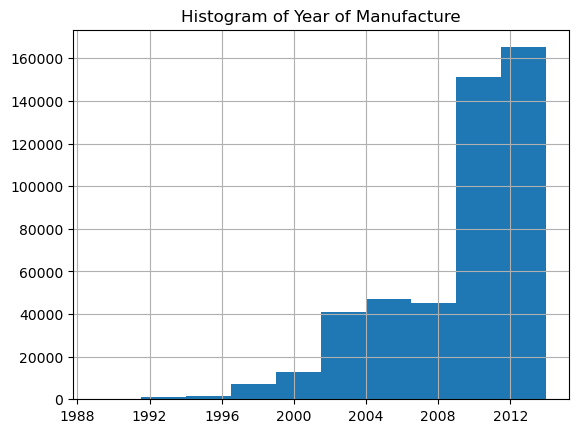

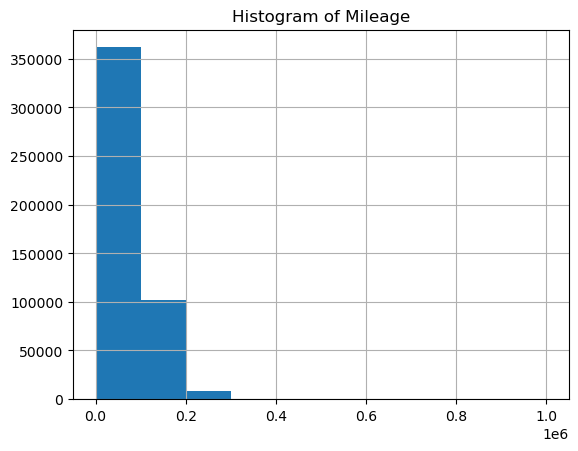

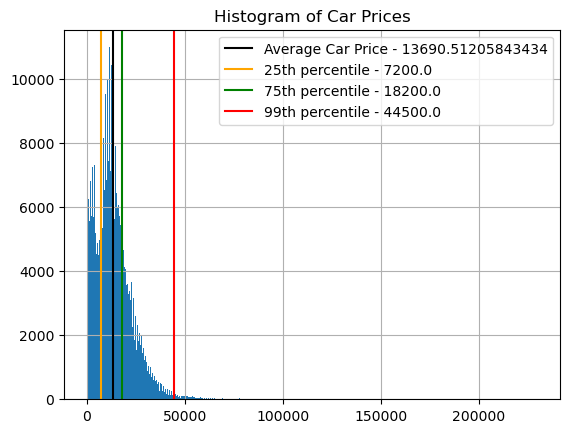

In [ ]:
# Histograms of numerical data
car_sales_df["year"].hist()
plt.title("Histogram of Year of Manufacture")
plt.show()

car_sales_df["odometer"].hist()
plt.title("Histogram of Mileage")
plt.show()

# The pretty plot
car_sales_df["sellingprice"].hist(bins=int(math.sqrt(car_sales_df["sellingprice"].size)))
plt.axvline(car_sales_df["sellingprice"].mean(), label=f"Average Car Price - {car_sales_df['sellingprice'].mean()}", color="black")
plt.axvline(car_sales_df["sellingprice"].quantile(.25), label=f"25th percentile - {car_sales_df['sellingprice'].quantile(.25)}", color="orange")
plt.axvline(car_sales_df["sellingprice"].quantile(.75), label=f"75th percentile - {car_sales_df['sellingprice'].quantile(.75)}", color="green")
plt.axvline(car_sales_df["sellingprice"].quantile(.99), label=f"99th percentile - {car_sales_df['sellingprice'].quantile(.99)}", color="red")
plt.title("Histogram of Car Prices")
plt.legend()
plt.show()

<h4>Conclusion #1 - The Relationship Between Age-at-sale and Selling Price</h4>

We examine whether there is a significantly negative linear relationship between the logarithm of age at sale and selling price. To control for potential confounding effects, we stratify the analysis by manufacturer.

The logarithmic transformation of age at sale accounts for the right-skewed distribution and the exponential depreciation pattern of car prices. Since the logarithm is a strictly increasing function, the direction of the relationship remains the same as in the original scale.

h0 : Average selling price for each manufacturer is not inversely correlated with age at date-of-sale.</br>
ha : Average selling price for each manufacturer is inversely correlated with age at date-of-sale.

We use an alpha value of 0.01.

<u>Results</u>
A table of results is shown below, filtered for models with at least 30 samples to satisfy the assumptions of our model. The p_value column represents the p-value from a two-tailed regression test. Because all slopes are negative, we can obtain the one-tailed p-value by dividing by two. Equivalently, we consider a result significant if the reported p-value is less than 0.005. As shown, this holds true for all entries, so for every car model we reject the null hypothesis. This shows that average selling price is inversely correlated with the age of the car at date-of-sale for all models.

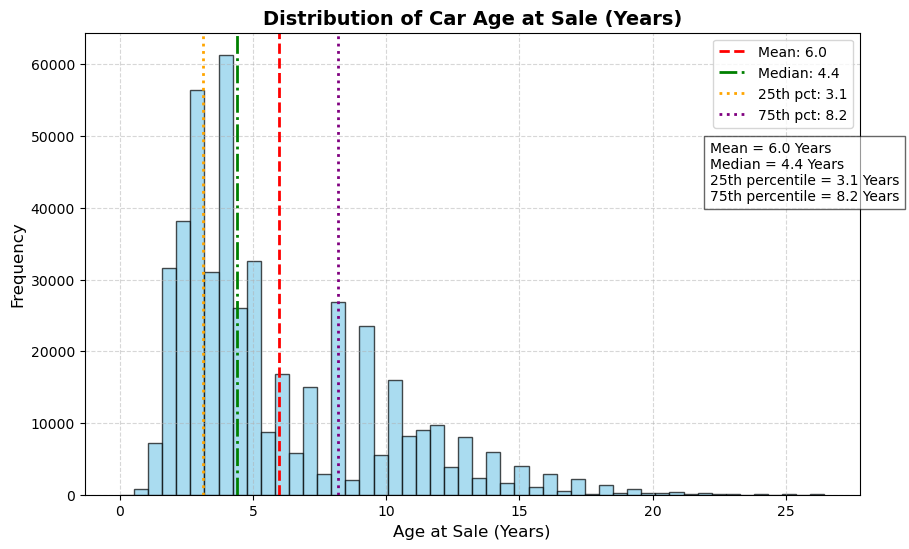

In [ ]:
# Lets start by creating and visualizing our data
car_sales_df["age_at_sale"] = car_sales_df["saledate"] - car_sales_df["year"]

ages = car_sales_df["age_at_sale"].dt.days / 365.25

# Compute statistics
mean_val = ages.mean()
median_val = ages.median()
p25 = ages.quantile(0.25)
p75 = ages.quantile(0.75)

# Create histogram
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(ages, bins=50, color="skyblue", edgecolor="black", alpha=0.7)

# Add vertical lines for key stats
ax.axvline(mean_val, color="red", linestyle="--", linewidth=2, label=f"Mean: {mean_val:.1f}")
ax.axvline(median_val, color="green", linestyle="-.", linewidth=2, label=f"Median: {median_val:.1f}")
ax.axvline(p25, color="orange", linestyle=":", linewidth=2, label=f"25th pct: {p25:.1f}")
ax.axvline(p75, color="purple", linestyle=":", linewidth=2, label=f"75th pct: {p75:.1f}")

# Customize plot
ax.set_title("Distribution of Car Age at Sale (Years)", fontsize=14, fontweight="bold")
ax.set_xlabel("Age at Sale (Years)", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
ax.grid(True, linestyle="--", alpha=0.5)
ax.legend()

# Display summary stats below the chart
summary_text = (
    f"Mean = {mean_val:.1f} Years\n"
    f"Median = {median_val:.1f} Years\n"
    f"25th percentile = {p25:.1f} Years\n"
    f"75th percentile = {p75:.1f} Years"
)
plt.figtext(0.75, 0.6, summary_text, fontsize=10, bbox=dict(facecolor='white', alpha=0.6))

plt.show()

<h3>Relationship within manufacturers</h3>
To further explore the relationship between the sale price of the car and the time the car was sold, we can look at the different plots for the different manufacturers.

/Users/zacharygottlieb/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/zacharygottlieb/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/zacharygottlieb/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


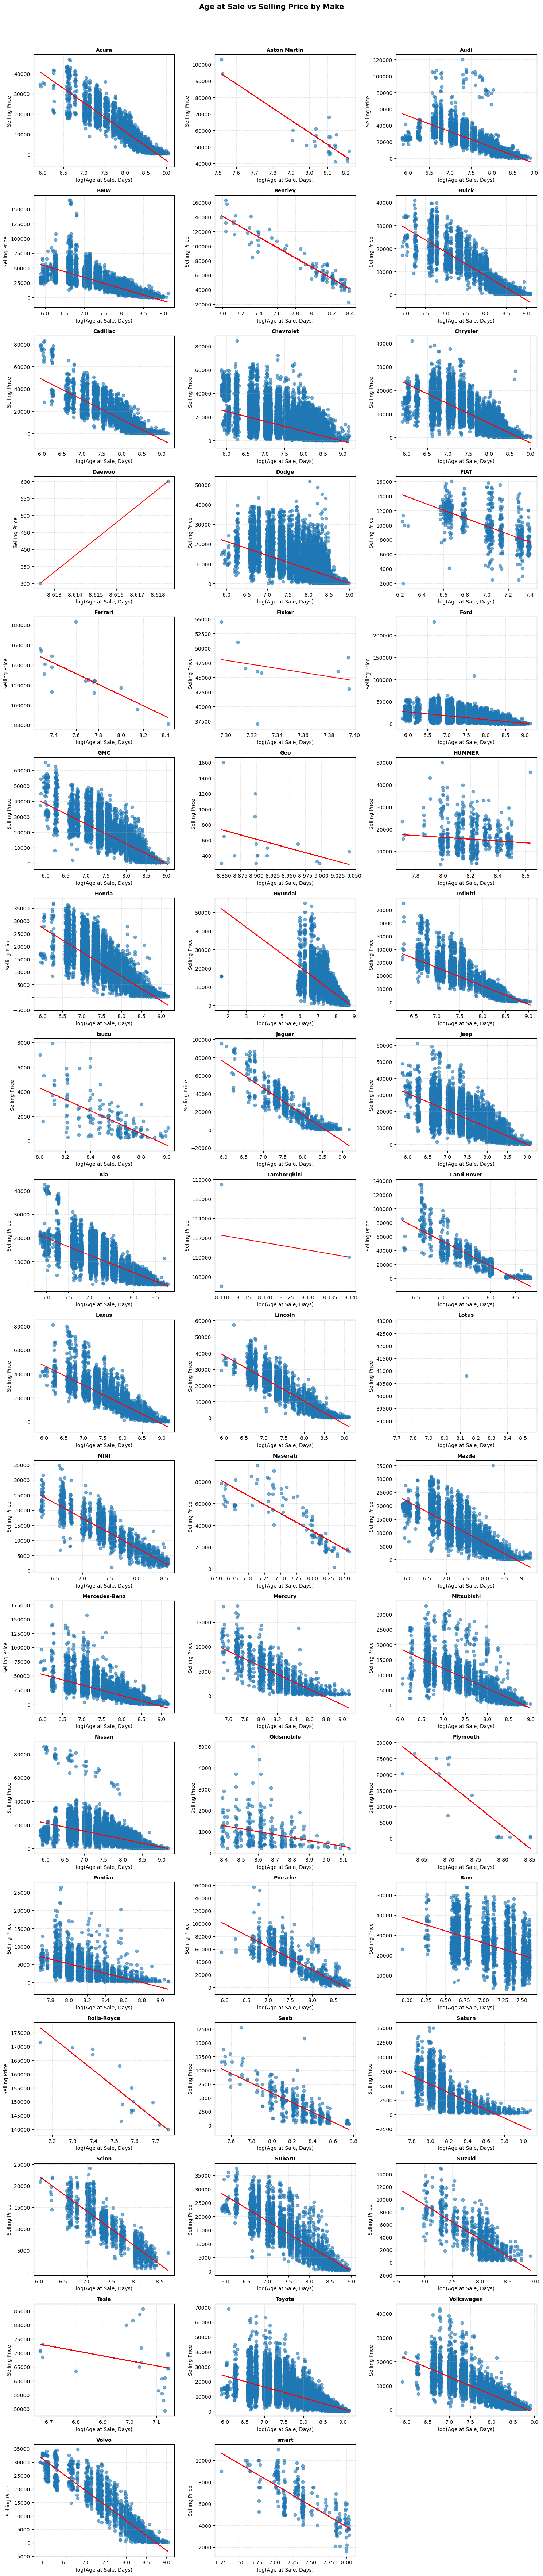

make         slope      intercept  r_squared        p_value  \
0           Acura -14367.574927  126111.689156   0.814467   0.000000e+00   
20           Audi -19077.368981  165925.241154   0.569782   0.000000e+00   
21            BMW -19749.804437  172113.236597   0.700462   0.000000e+00   
39        Bentley -71353.692615  640267.166406   0.902505   7.061489e-54   
23          Buick -10436.566516   91630.728406   0.720159   0.000000e+00   
24       Cadillac -17926.827616  155979.125246   0.678586   0.000000e+00   
25      Chevrolet  -8347.427233   74653.150820   0.356957   0.000000e+00   
18       Chrysler  -8315.417309   72555.290940   0.671989   0.000000e+00   
28          Dodge  -7042.701755   63558.198314   0.434857   0.000000e+00   
37           FIAT  -5489.014168   48271.330264   0.400099   2.792176e-82   
30           Ford  -8677.152345   78543.244428   0.346703   0.000000e+00   
31            GMC -12879.890144  115506.376188   0.628810   0.000000e+00   
47         HUMMER  -4097.152084   49020.044155   0.009001   8.515933e-03   
17          Honda  -9569.238356   84674.646012   0.683540   0.000000e+00   
7         Hyundai  -7181.888171   63545.545978   0.470704   0.000000e+00   
1        Infiniti -13935.160695  123645.291972   0.617767   0.000000e+00   
41          Isuzu  -4631.096168   41339.797039   0.454137   4.761581e-25   
2          Jaguar -29224.390020  250488.327279   0.826279   0.000000e+00   
3            Jeep -10273.131802   92425.789893   0.510926   0.000000e+00   
4             Kia  -7344.054009   64018.948016   0.637345   0.000000e+00   
6      Land Rover -36539.858078  310061.091441   0.728927   0.000000e+00   
8           Lexus -16119.859951  143567.426007   0.738760   0.000000e+00   
15        Lincoln -14088.830956  122971.778703   0.792892   0.000000e+00   
9            MINI  -9815.922787   86054.669203   0.774553   0.000000e+00   
40       Maserati -32502.748799  294607.519084   0.667091   2.609532e-27   
10          Mazda  -7718.192359   67895.757754   0.659698   0.000000e+00   
11  Mercedes-Benz -18628.337216  163993.457608   0.546134   0.000000e+00   
12        Mercury  -7773.926405   68129.739890   0.621654   0.000000e+00   
13     Mitsubishi  -6556.421913   57960.909732   0.579227   0.000000e+00   
14         Nissan  -6834.869326   62470.826918   0.375004   0.000000e+00   
43     Oldsmobile  -1390.224169   12952.969599   0.088056   6.936989e-08   
27        Pontiac  -6480.339369   56997.453668   0.326874   0.000000e+00   
33        Porsche -35753.658373  313592.698484   0.688749  5.280718e-295   
34            Ram -12098.213431  110741.388667   0.220257  1.149539e-220   
36           Saab  -8840.661982   76610.424274   0.605477   1.225837e-85   
16         Saturn  -7280.853106   63461.497051   0.513983   0.000000e+00   
26          Scion  -8193.130217   71416.061663   0.751657   0.000000e+00   
29         Subaru  -9191.259827   82660.039417   0.709713   0.000000e+00   
35         Suzuki  -5445.477932   47248.270180   0.563907  6.701890e-178   
22         Toyota  -7415.130205   68160.186477   0.423977   0.000000e+00   
19     Volkswagen  -7456.066833   65829.813164   0.651636   0.000000e+00   
5           Volvo -11036.399336   96537.451790   0.880310   0.000000e+00   
38          smart  -3879.416386   34910.424049   0.560402   7.960942e-63   

        std_err  samples  
0    102.212081     4503  
20   239.269987     4802  
21    97.609277    17509  
39  2310.810318      105  
23    97.328952     4470  
24   155.279999     6315  
25    48.147473    54150  
18    47.229463    15133  
28    48.699916    27181  
37   249.966045      725  
30    41.848657    81013  
31   103.086751     9217  
47  1553.294524      768  
17    41.363074    24781  
7     55.756201    18659  
1     92.610576    14011  
41   381.632354      179  
2    378.256206     1257  
3     89.073015    12735  
4     44.037584    15827  
6    613.310900     1322  
8     93.965133    10409  
15   102.614097     4926  
9     97.602092     

In [ ]:
# Create different dataframes based on the make of the cars
grouped_by_make = car_sales_df.groupby("make")

n = len(grouped_by_make)
cols = 3  # adjust as you like
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes = axes.flatten()

results = []

# Create the plot for each make
for i, (make, group) in enumerate(grouped_by_make):
    group = group[group["age_at_sale"].dt.days != 0]
    if group.empty:
        continue

    # X axis will be the logrithm of how old the car is at sale (days). The Y axis is the selling price of the car
    x = group["age_at_sale"].dt.days.apply(math.log)
    y = group["sellingprice"]

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    results.append({
        "make": make,
        "slope": slope,
        "intercept": intercept,
        "r_squared": r_value**2,
        "p_value": p_value,
        "std_err": std_err,
        "samples": y.size
    })

    # Plot scatter + regression line
    ax = axes[i]
    ax.scatter(x, y, alpha=0.6)
    ax.plot(x, slope * x + intercept, color="red", lw=1.5)
    ax.set_title(f"{make}", fontsize=10, fontweight="bold")
    ax.set_xlabel("log(Age at Sale, Days)")
    ax.set_ylabel("Selling Price")
    ax.grid(True, linestyle="--", alpha=0.3)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

fig.suptitle("Age at Sale vs Selling Price by Make", fontsize=14, fontweight="bold")
fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
results_df = results_df.sort_values("p_value").reset_index(drop=True)
display(results_df.query("samples >= 30").sort_values(by="make"))

<h4>Conclusion #2 - Checking for Outliers in Numeric-like Features</h4>

We check for outlier values in the following features:</br>
odometer, sellingprice, age_at_sale, and year </br>

First we visualize our data using a box-and-whiskers plot and histograms (again, since we have introduced new data). Then, we quantitativley classify outliers using 1st and 99th percentile cutoffs, and |z-score| > 3

Results are shown below. From them we conclude that odometer, sellingprice, and age_at_sale are all significantly rightly skewed with many outliers at > 3 sigma while no outliers were < 3 sigma. While year was significantly left skewed with the converse being true. The skewedness can also be seen in the histograms with the medians being much further left than the means for odometer, sellingprice, and age_at_sale and much further right for year.

In [ ]:
car_sales_df.dtypes

year            datetime64[ns, UTC]
make                         object
model                        object
trim                         object
body                         object
transmission                 object
vin                          object
state                        object
condition                   float64
odometer                    float64
color                        object
interior                     object
seller                       object
mmr                         float64
sellingprice                float64
saledate        datetime64[ns, UTC]
age_at_sale         timedelta64[ns]
dtype: object

<h3>Format the data</h3>

In [ ]:
# The columns that we want to check the outlier values for
numeric_columns = ("odometer", "sellingprice", "age_at_sale", "year")

# Create a new dataframe using only those columns. Transform the data to be correct (correct days be dividing by days in a year).
numeric_df = car_sales_df[["odometer", "sellingprice", "age_at_sale", "year"]].copy()
numeric_df["age_at_sale"] = numeric_df["age_at_sale"].dt.days / 365.25
numeric_df["year"] = numeric_df["year"].dt.year

display(numeric_df.describe())

odometer   sellingprice    age_at_sale           year
count  472325.000000  472325.000000  472325.000000  472325.000000
mean    66701.732040   13690.512058       5.967280    2009.210980
std     51939.586894    9613.033738       3.810300       3.822151
min         1.000000       1.000000       0.000000    1989.000000
25%     28137.000000    7200.000000       3.129363    2007.000000
50%     51085.000000   12200.000000       4.416153    2011.000000
75%     96590.000000   18200.000000       8.172485    2012.000000
max    999999.000000  230000.000000      26.453114    2014.000000

<h3>Create the plots</h3>

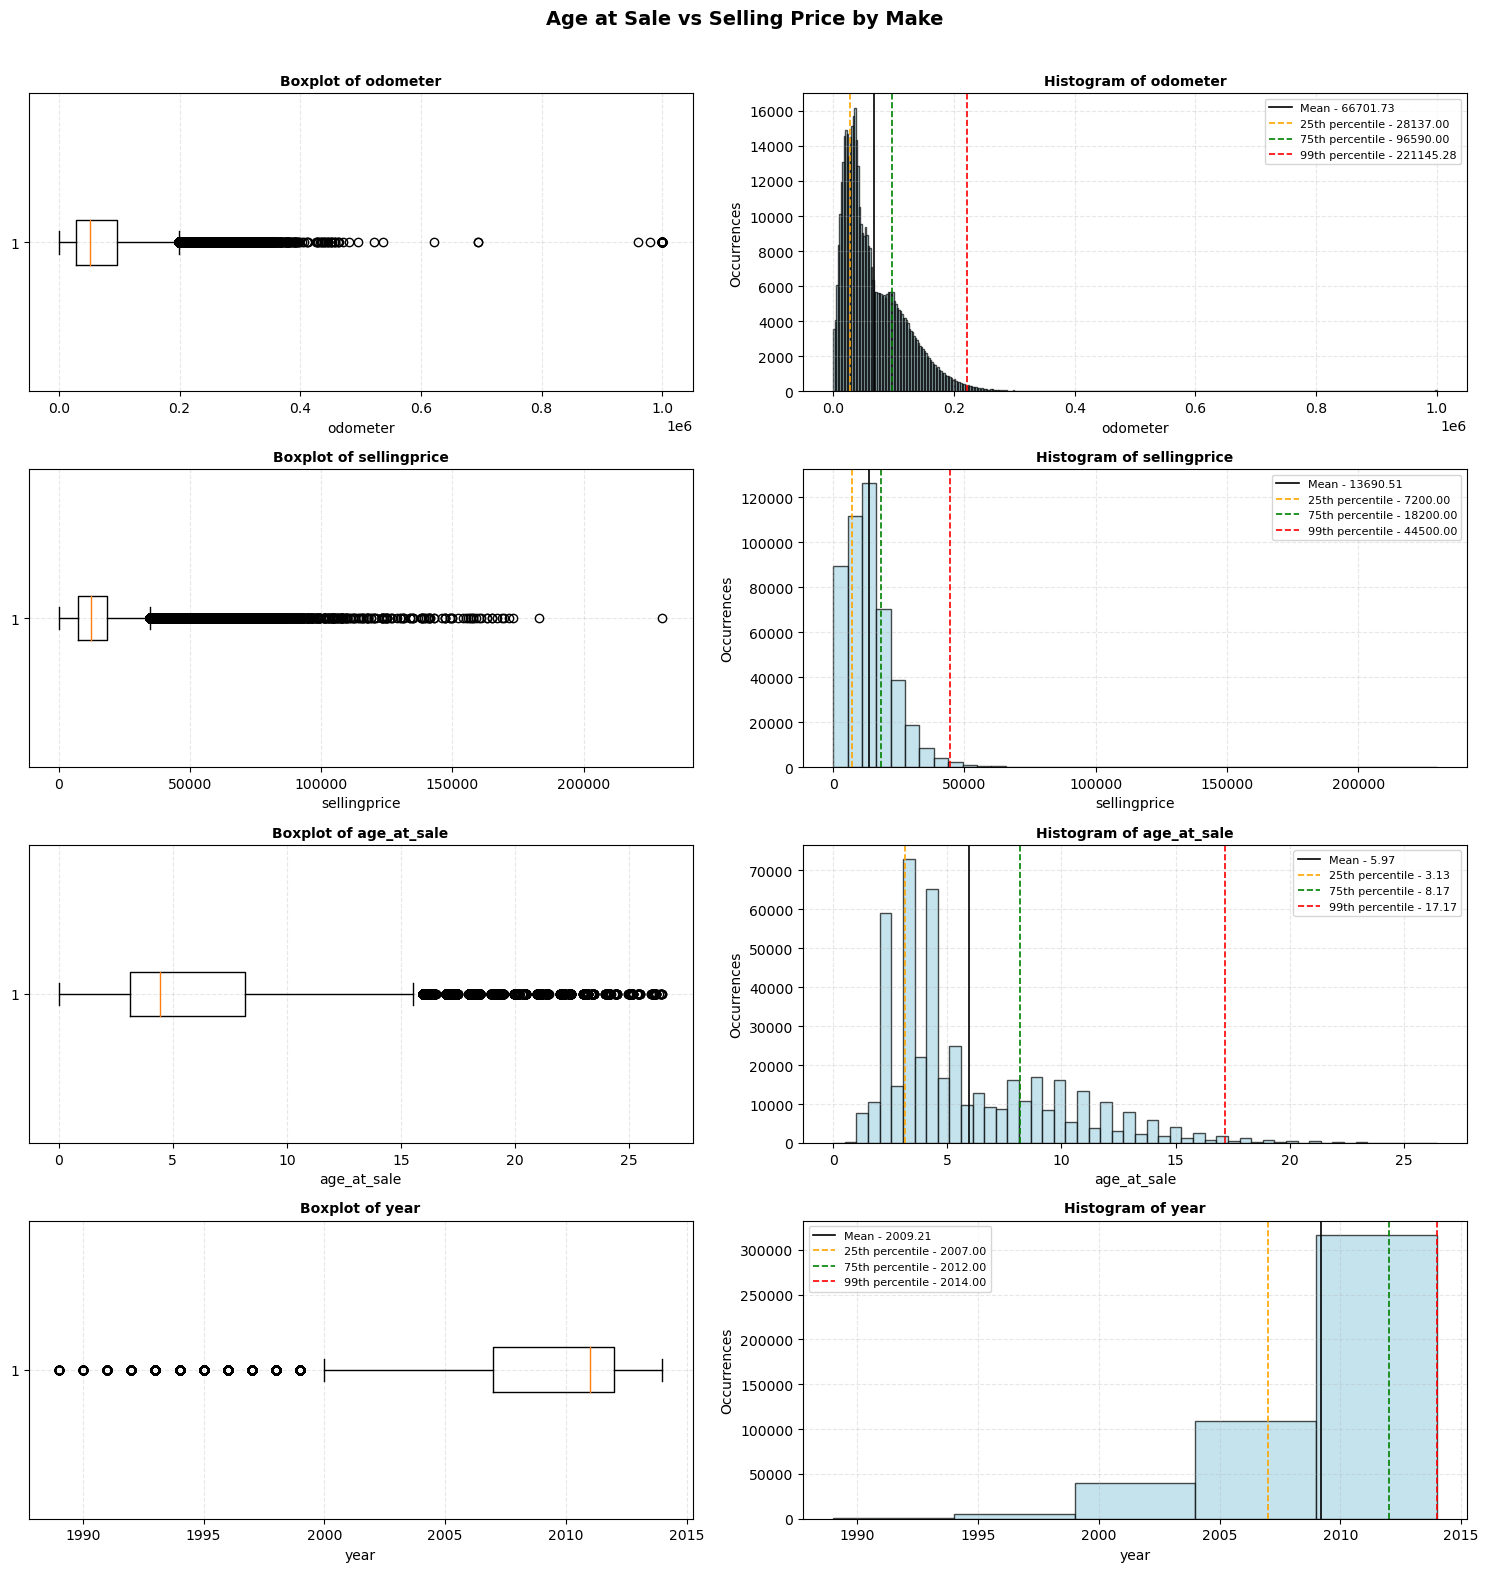

In [ ]:
n = len(numeric_columns)
cols = 2  # adjust as you like
rows = math.ceil(n / cols) * 2

fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    curr = numeric_df[col]

    ax = axes[2 * i]
    ax.boxplot(curr, vert=False)
    ax.set_title(f"Boxplot of {col}", fontsize=10, fontweight="bold")
    ax.set_xlabel(col)
    ax.grid(True, linestyle="--", alpha=0.3)

    ax = axes[2 * i + 1]
    bins = int(math.sqrt(len(curr.unique())))
    ax.hist(curr, bins=bins, color="lightblue", edgecolor="black", alpha=0.7)

    # Add vertical lines for statistics
    ax.axvline(curr.mean(), color="black", linestyle="-", linewidth=1.2,
               label=f"Mean - {curr.mean():.2f}")
    ax.axvline(curr.quantile(0.25), color="orange", linestyle="--", linewidth=1.2,
               label=f"25th percentile - {curr.quantile(0.25):.2f}")
    ax.axvline(curr.quantile(0.75), color="green", linestyle="--", linewidth=1.2,
               label=f"75th percentile - {curr.quantile(0.75):.2f}")
    ax.axvline(curr.quantile(0.99), color="red", linestyle="--", linewidth=1.2,
               label=f"99th percentile - {curr.quantile(0.99):.2f}")

    # Titles and labels
    ax.set_title(f"Histogram of {col}", fontsize=10, fontweight="bold")
    ax.set_xlabel(col)
    ax.set_ylabel("Occurrences")
    ax.legend(fontsize=8)
    ax.grid(True, linestyle="--", alpha=0.3)

fig.suptitle("Age at Sale vs Selling Price by Make", fontsize=14, fontweight="bold")
fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [ ]:
# Get outliers based on 0.1 0.99, |z| > 3

def num_less_than_1st_percentile(x):
    return x[x < x.quantile(0.01)].count()

def num_greater_than_99th_percentile(x):
    return x[x > x.quantile(0.99)].count()

def num_greater_than_3z(x):
    return x[zscore(x) > 3].count()

def num_less_than_neg3z(x):
    return x[zscore(x) < -3].count()

aggregated_outliers = numeric_df.agg([
    num_less_than_1st_percentile,
    num_greater_than_99th_percentile,
    num_greater_than_3z,
    num_less_than_neg3z
])

display(aggregated_outliers)

odometer  sellingprice  age_at_sale  year
num_less_than_1st_percentile          4724          3825         4552  4145
num_greater_than_99th_percentile      4724          4656         4703     0
num_greater_than_3z                   4550          5841         4473     0
num_less_than_neg3z                      0             0            0  4145

<h4>Conclusion #3 - Investigating MMR vs Selling Price</h4>

The dataset has an interesting attribute, MMR, which they describe as...
"MMR values offer an estimate of the market value of each vehicle, allowing for analysis of market trends and fluctuations."

In this section, we investigate the relationship between mmr and selling price by examining the difference between them - estimate_diff. It will be defined at sellingprice-mmr, representing how much a car sold for over its estimated value.

<u>Results</u>
</br>Firstly, we notice that the mean difference is about -$146.55, meaning that on average, cars sell for $146.55 below their "fair value." This makes sense, as car sales are typically seller-initiated. The standard deviation is very wide, about $1,741.

Next, we look for outliers by displaying values outside of 3 standard deviations. There are 6792 values outside of this range, representing extreme skewness. This is visualized by the histogram.

When plotting our scatter plot with a linear regression line we determine that there is a positive linear relation (p=0) between sellingprice and mmr. This coincides with common sense that more expensive and lower volume markets are less effecient.

In [ ]:
car_sales_df["estimate_diff"] = car_sales_df["sellingprice"] - car_sales_df["mmr"]
display(car_sales_df["estimate_diff"].describe())

count    472325.000000
mean       -146.546905
std        1741.175011
min      -87750.000000
25%        -800.000000
50%         -50.000000
75%         650.000000
max      207200.000000
Name: estimate_diff, dtype: float64

index  estimate_diff
0          9        -8800.0
1         20       -17100.0
2         40        -5400.0
3         56        -6800.0
4         59         6250.0
...      ...            ...
6788  558777       -13050.0
6789  558779       -15000.0
6790  558791        -7100.0
6791  558807         5500.0
6792  558826       -12500.0

[6793 rows x 2 columns]

<Axes: >

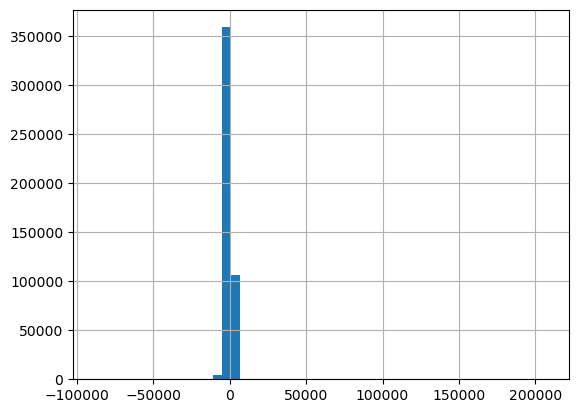

In [ ]:
display(car_sales_df["estimate_diff"][abs(zscore(car_sales_df["estimate_diff"])) > 3].reset_index())
car_sales_df["estimate_diff"].hist(bins=50)

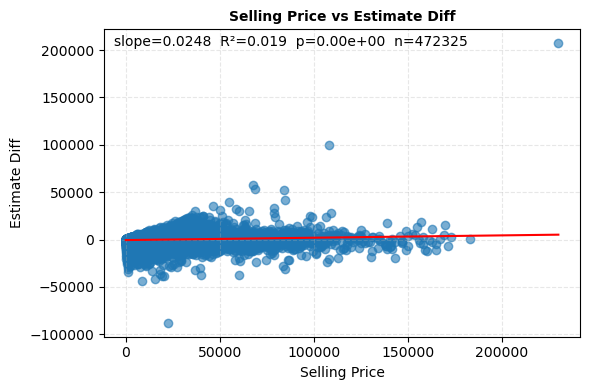

In [ ]:
# Clean
df = car_sales_df[["sellingprice", "estimate_diff"]]
x = df["sellingprice"].astype(float).values
y = df["estimate_diff"].astype(float).values
if df.empty:
    raise ValueError("No data to plot after dropping NaNs.")

# Fit
slope, intercept, r, p, se = linregress(x, y)

# Plot scatter + regression line
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(x, y, alpha=0.6)
xs = np.linspace(x.min(), x.max(), 200)
ax.plot(xs, slope * xs + intercept, color="red", lw=1.5)

ax.set_title("Selling Price vs Estimate Diff", fontsize=10, fontweight="bold")
ax.set_xlabel("Selling Price")
ax.set_ylabel("Estimate Diff")
ax.grid(True, linestyle="--", alpha=0.3)

ax.text(
    0.02, 0.98,
    f"slope={slope:.3g}  R²={r**2:.3f}  p={p:.2e}  n={len(df)}",
    transform=ax.transAxes, va="top"
)

plt.tight_layout()
plt.show()

<h1>Primary Analysis</h1>

ML model:

We want to predict sales price of a car given certain features. Regression problem.

In [ ]:
# ML Model for Car Sales Price Prediction
# Based on insights from previous analysis:
# 1. MMR is a strong predictor (positive linear relationship)
# 2. Age at sale is inversely correlated with price
# 3. Need to handle categorical features (make, model, body, transmission, state)
# 4. Outliers exist in odometer, sellingprice, age_at_sale

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
random_state = 42
np.random.seed(random_state)

### Feature Engineering and Data Preparation

We'll create features based on our insights:
- Use MMR as a key feature (strong predictor)
- Calculate age_at_sale (inversely correlated with price)
- Handle categorical variables (make, model, body, transmission, state)
- Use numerical features: odometer, condition, year
- Consider handling outliers for better model performance

In [ ]:
# Prepare a clean copy of the dataframe for ML
ml_df = car_sales_df.copy()

# Ensure age_at_sale is calculated (in case it wasn't in previous cells)
if "age_at_sale" not in ml_df.columns:
    ml_df["age_at_sale"] = ml_df["saledate"] - ml_df["year"]
    ml_df["age_at_sale_years"] = ml_df["age_at_sale"].dt.days / 365.25
else:
    ml_df["age_at_sale_years"] = ml_df["age_at_sale"].dt.days / 365.25


ml_df["year_numeric"] = ml_df["year"].dt.year

# Create additional features
# 1. Log of age (as we found log relationship in analysis)
ml_df["log_age_at_sale"] = np.log1p(ml_df["age_at_sale_years"])

# 2. Log of odometer (to handle right skewness)
ml_df["log_odometer"] = np.log1p(ml_df["odometer"])

# 3. Mileage per year (condition indicator)
ml_df["miles_per_year"] = ml_df["odometer"] / (ml_df["age_at_sale_years"] + 0.1)  # +0.1 to avoid division by zero

# Display basic info
print(f"Dataset shape: {ml_df.shape}")
print(f"\nMissing values:")
print(ml_df.isnull().sum()[ml_df.isnull().sum() > 0])

Dataset shape: (472325, 23)

Missing values:
Series([], dtype: int64)


In [ ]:
# Select features for modeling
# Numerical features
numerical_features = [
    'mmr',  # Strong predictor from analysis
    'odometer',
    'condition',
    'age_at_sale_years',
    'log_age_at_sale',  # Log transformation based on analysis
    'log_odometer',
    'miles_per_year',
    'year_numeric'
]

# Categorical features (will be encoded)
categorical_features = [
    'make',
    'model',
    'body',
    'transmission',
    'state'
]

# Target variable
target = 'sellingprice'

# Check which features exist
available_numerical = [f for f in numerical_features if f in ml_df.columns]
available_categorical = [f for f in categorical_features if f in ml_df.columns]

print(f"Available numerical features: {available_numerical}")
print(f"Available categorical features: {available_categorical}")

# Create feature matrix and target
# For tree-based models, we can use label encoding for categoricals
# For linear models, we'd need one-hot encoding, but we'll use tree-based models primarily

# Prepare data - drop rows with missing target
ml_df_clean = ml_df.dropna(subset=[target]).copy()

print(f"\nClean dataset shape: {ml_df_clean.shape}")
print(f"Target variable statistics:")
print(ml_df_clean[target].describe())


Available numerical features: ['mmr', 'odometer', 'condition', 'age_at_sale_years', 'log_age_at_sale', 'log_odometer', 'miles_per_year', 'year_numeric']
Available categorical features: ['make', 'model', 'body', 'transmission', 'state']

Clean dataset shape: (472325, 23)
Target variable statistics:
count    472325.000000
mean      13690.512058
std        9613.033738
min           1.000000
25%        7200.000000
50%       12200.000000
75%       18200.000000
max      230000.000000
Name: sellingprice, dtype: float64


In [ ]:
# Encode categorical variables using Label Encoding
# (Tree-based models can handle label-encoded categoricals well)
label_encoders = {}
ml_df_encoded = ml_df_clean.copy()

for col in available_categorical:
    le = LabelEncoder()
    ml_df_encoded[col + '_encoded'] = le.fit_transform(ml_df_encoded[col].astype(str))
    label_encoders[col] = le
    print(f"{col}: {len(le.classes_)} unique values")

# Create final feature list
feature_columns = available_numerical + [col + '_encoded' for col in available_categorical]

# Extract features and target
X = ml_df_encoded[feature_columns].copy()
y = ml_df_encoded[target].copy()

print(f"\nFeature matrix shape: {X.shape}")
print(f"Features used: {feature_columns}")


make: 53 unique values
model: 768 unique values
body: 85 unique values
transmission: 2 unique values
state: 34 unique values

Feature matrix shape: (472325, 13)
Features used: ['mmr', 'odometer', 'condition', 'age_at_sale_years', 'log_age_at_sale', 'log_odometer', 'miles_per_year', 'year_numeric', 'make_encoded', 'model_encoded', 'body_encoded', 'transmission_encoded', 'state_encoded']


In [ ]:
# Handle any remaining missing values (shouldn't be many after cleaning)
print(f"Missing values in X: {X.isnull().sum().sum()}")
if X.isnull().sum().sum() > 0:
    # Fill with median for numerical, mode for categorical
    for col in X.columns:
        if X[col].isnull().sum() > 0:
            if '_encoded' in col:
                X[col].fillna(X[col].mode()[0], inplace=True)
            else:
                X[col].fillna(X[col].median(), inplace=True)

# Split data into train and test sets
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=random_state, shuffle=True
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"\nTraining target statistics:")
print(y_train.describe())


Missing values in X: 0
Training set size: 377860
Test set size: 94465

Training target statistics:
count    377860.000000
mean      13696.451699
std        9632.775108
min           1.000000
25%        7200.000000
50%       12200.000000
75%       18200.000000
max      230000.000000
Name: sellingprice, dtype: float64


### Model Training and Evaluation

We'll train two linear regression models:
1. **Linear Regression** - Baseline linear model (Ordinary Least Squares)
2. **Ridge Regression** - Regularized linear model with L2 penalty (prevents overfitting)

**Note:** Logistic Regression is for classification problems (predicting categories), not Linear Regression (predicting continuous values like price). Since we're predicting car sale price (a continuous value), we use Linear and Ridge Regression instead.

We'll evaluate using:
- R² Score (coefficient of determination)
- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)


In [ ]:
# Initialize models
# Using Linear Regression and Ridge Regression (regularized linear model)
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=random_state)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"\n{'='*60}")
    print(f"Training {name}...")

    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    results[name] = {
        'model': model,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'y_test_pred': y_test_pred
    }

    print(f"Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")
    print(f"Train MAE: ${train_mae:.2f} | Test MAE: ${test_mae:.2f}")
    print(f"Train RMSE: ${train_rmse:.2f} | Test RMSE: ${test_rmse:.2f}")



Training Linear Regression...
Train R²: 0.9697 | Test R²: 0.9713
Train MAE: $1043.20 | Test MAE: $1037.53
Train RMSE: $1677.50 | Test RMSE: $1614.93

Training Ridge Regression...
Train R²: 0.9697 | Test R²: 0.9713
Train MAE: $1043.20 | Test MAE: $1037.53
Train RMSE: $1677.50 | Test RMSE: $1614.92


In [ ]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train R²': [results[m]['train_r2'] for m in results.keys()],
    'Test R²': [results[m]['test_r2'] for m in results.keys()],
    'Train MAE': [results[m]['train_mae'] for m in results.keys()],
    'Test MAE': [results[m]['test_mae'] for m in results.keys()],
    'Train RMSE': [results[m]['train_rmse'] for m in results.keys()],
    'Test RMSE': [results[m]['test_rmse'] for m in results.keys()]
})

# Sort by Test R² (best first)
comparison_df = comparison_df.sort_values('Test R²', ascending=False).reset_index(drop=True)

print("\n" + "="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80)
display(comparison_df.round(4))

# Identify best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = results[best_model_name]['model']
print(f"\n Best Model: {best_model_name}")
print(f"   Test R²: {comparison_df.iloc[0]['Test R²']:.4f}")
print(f"   Test MAE: ${comparison_df.iloc[0]['Test MAE']:.2f}")
print(f"   Test RMSE: ${comparison_df.iloc[0]['Test RMSE']:.2f}")



MODEL COMPARISON SUMMARY


Model  Train R²  Test R²  Train MAE   Test MAE  Train RMSE  \
0   Ridge Regression    0.9697   0.9713  1043.2025  1037.5325   1677.5018   
1  Linear Regression    0.9697   0.9713  1043.2029  1037.5328   1677.5018   

   Test RMSE  
0  1614.9248  
1  1614.9250


 Best Model: Ridge Regression
   Test R²: 0.9713
   Test MAE: $1037.53
   Test RMSE: $1614.92


<h1>Visualization</h1>

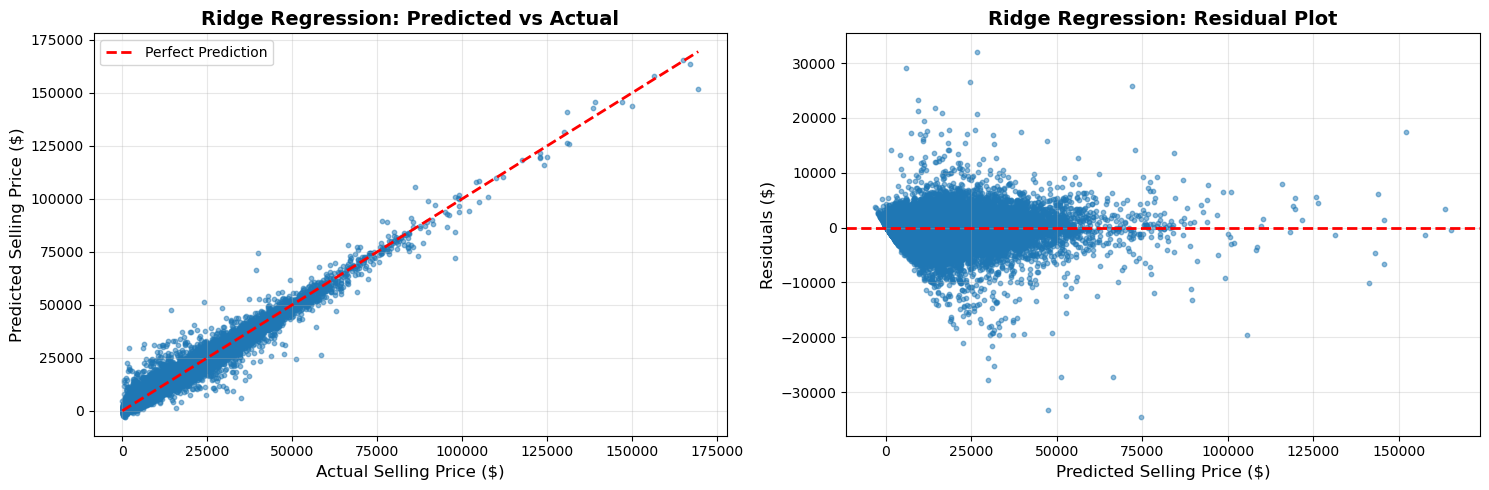


Residual Statistics:
Mean residual: $5.58
Std residual: $1614.92
95% of predictions within: ±$3010.13


In [ ]:
# Plot predictions vs actual for best model
best_pred = results[best_model_name]['y_test_pred']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot: Predicted vs Actual
axes[0].scatter(y_test, best_pred, alpha=0.5, s=10)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Selling Price ($)', fontsize=12)
axes[0].set_ylabel('Predicted Selling Price ($)', fontsize=12)
axes[0].set_title(f'{best_model_name}: Predicted vs Actual', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Residual plot
residuals = y_test - best_pred
axes[1].scatter(best_pred, residuals, alpha=0.5, s=10)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Selling Price ($)', fontsize=12)
axes[1].set_ylabel('Residuals ($)', fontsize=12)
axes[1].set_title(f'{best_model_name}: Residual Plot', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print some statistics about residuals
print(f"\nResidual Statistics:")
print(f"Mean residual: ${residuals.mean():.2f}")
print(f"Std residual: ${residuals.std():.2f}")
print(f"95% of predictions within: ±${np.percentile(np.abs(residuals), 95):.2f}")


**Model Insights and Summary**



**Key Findings:**
1. **MMR** is expected to be the strongest predictor (as found in our analysis)
2. **Age at sale** (and its log transformation) should be important due to inverse correlation
3. **Odometer** and **miles per year** indicate vehicle condition
4. **Make and Model** capture brand value and model-specific pricing
5. **Body type** and **transmission** affect pricing

The best model will be selected based on Test R² score, which measures how well the model explains variance in selling prices.

<h1> Insights and Conclusion </h1>

Throughout this tutorial, we reviewed some data science steps to create a machine learning model capable of accurately predicting the price of a used car. To build this model, we had to identify the characteristics that influence the selling price of used cars. As expected, we demonstrated that the age and mileage of the vehicle are inversely correlated with its selling price. Besides age and mileage, we discovered that the Manheim Market Report (MMR) valuation is the best predictor of the final selling price. In summary, market estimation alone is very accurate, but additional factors such as the condition and age of the vehicle can also influence the final price.

However, the results go beyond simple correlation. We examined the risk of overfitting by comparing a linear regression model to a ridge regression model. The results showed that while a simple linear model explained most of the variance (coefficient of determination, R²), the ridge regression model predicted the test data slightly better, thus providing a more robust model that is more easily generalizable to new data.

This project shows that there is predictability in the apparent randomness of used car prices. Vehicle prices follow dependable trends related to their attributes, such as MMR and log age, trends that can be effectively modeled. Our resulting models can be very powerful tools for determining the proper fair market value of a used vehicle. for both buyers and sellers.